## 5_3.独立した2群の差のt検定(分散が等しいと仮定できる場合のt検定)

In [1]:
import pandas as pd
from scipy import stats

# CSVファイルのデータをデータフレームに読み込む
df = pd.read_csv('scoring.csv')

# スチューデントのt検定を実施
# nan_policy='omit'でNaNを無視して計算を行う
statistic, pvalue = stats.ttest_ind(
    df['Our'],
    df['Rival'],
    nan_policy='omit'
)

# 結果を出力
print('検定統計量： ', statistic)
print('p値：　', pvalue)

検定統計量：  -1.5795970073575796
p値：　 0.13376331725019378


In [2]:
# 自由度を求める
# 'Rival'には欠損値NaNがあるので，データサイズからNaNの数を除いて計算する
dof = len(df['Our']) + (len(df['Rival'])) - df['Rival'].isnull().sum() - 2

# 自由度を出力
print('自由度：　', dof)

# 自由度１６のt分布で0０２５(0.05 ÷ 2)のパーセント点のt値を求める
low = stats.t.ppf(q=0.025, df=dof)
# 自由度16のt分布で0.975(1-(0.05 ÷ 2))のパーセント点のt値を求める
upp = stats.t.ppf(q=0.975, df=dof)
# 結果を出力
print('下限値境界：　', low)
print('上限値境界：', upp)

自由度：　 16
下限値境界：　 -2.1199052992210112
上限値境界： 2.1199052992210112


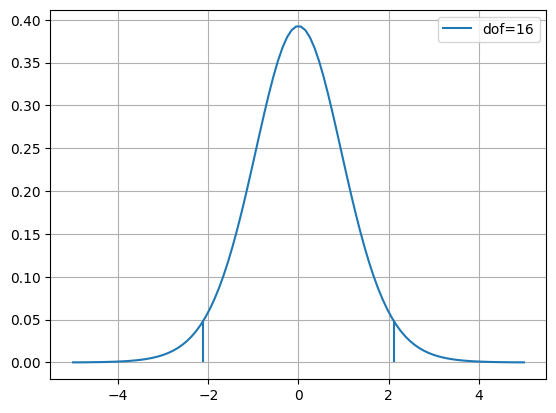

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# -5~5の範囲で100個の等差数列を作成
x = np.linspace(-5, 5, 100)

# xに対するt分布の確率密度を求める
y = stats.t.pdf(x, df=dof)
# 確率密度のラインを描画
plt.plot(x, y, label=f'dof={dof}')

# パーセント点の0.025におけるt値
xnum_low = low
# パーセント点0.025におけるt値の確率密度（y軸の値）を求める
ymax_low = stats.t.pdf(xnum_low, df=dof)
# 確率密度のグラフ上にパーセント点0.025の境界線（垂直線）を引く
plt.vlines(
    x=xnum_low,
    ymin=0,
    ymax=ymax_low
)

# パーセント点0.975におけるt値
xnum_upp = upp
# パーセント点0.975におけるt値の確率密度（y軸の値）を求める
ymax_upp = stats.t.pdf(xnum_upp, df=dof)

# 確率密度のグラフ上にパーセント点0.975の境界線（垂直線）を引く
plt.vlines(
    x=xnum_upp,
    ymin=0,
    ymax=ymax_upp
)
# 凡例（自由度）を表示
plt.legend()
# グリッド表示
plt.grid()
plt.show()